# Zonal-time mean Response
* Wenchang Yang (wenchang@princeton.edu)
* Department of Geosciences, Princeton University

## import and parameters

In [184]:
%matplotlib notebook
!date

import numpy as np
import matplotlib.pyplot as plt
# plt.rcParams['hatch.color']='g'
import xarray as xr
from scipy.stats import ttest_1samp
import statsmodels.api as sm

from plotsetting import *
from geoplots import mapplot, xticksyear, xticksmonth, yticks2lat
import geoxarray

Wed Jul 25 17:11:26 EDT 2018


/tigress/wenchang/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [5]:
# parameters
data_names = ['netrad_toa', 't_surf', 'precip']
figname = f'figs/fig_globalMean.pdf'
prcp_scale = 3600 * 24

ds = xr.open_dataset('/tigress/wenchang/MODEL_OUT/PIctl_CMIP6volc/POSTP/00010101.ocean_grid.nc')
ocean_tgrid_area = ds.area_t + ds.ht*0 # ds.ht*0 is the ocean mask

# global mean for ocean data
def area_mean(da, yt_ocean=None):
    '''area-weighted average for ocean data'''
    if yt_ocean is None:
        da_ = da
        area = ocean_tgrid_area
    else:
        da_ = da.sel(yt_ocean=yt_ocean)
        area = ocean_tgrid_area.sel(yt_ocean=yt_ocean)
    return (da * area).sum(['xt_ocean', 'yt_ocean'])/area.sum()

# land/ocean grids
new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}
ds = xr.open_dataset('/tigress/wenchang/MODEL_OUT/CTL1860_noleap_tigercpu_intelmpi_18_576PE/POSTP/00010101.atmos_month.nc')
land_mask = ds.land_mask.rename(new_names)
land_grids = land_mask.where(land_mask>.5) * 0 #
ocean_grids = land_mask.where(land_mask<.5) * 0 # land mask in atmos grids

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/times.py:132: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  enable_cftimeindex)
/tigress/wenchang/miniconda3/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason: dates out of range
  return self.func(self.array[key])


## Data

In [4]:
das = dict()

### Agung 

In [7]:
# Agung data
volkey = 'agung'
volcano_name = 'Agung'
year_volcano = 1963
ens = range(1,31)
das[volkey] = dict()

for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_agung import open_data as get_volcano
    
    nbname = f'volcano_impact_on_climate_{volkey}.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    das[volkey][data_name] = daa.load()

Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_agung.ipynb.precip.nc


### Santa Maria

In [8]:
# St Maria data
volkey = 'stmaria'
volcano_name = 'Santa Maria'
year_volcano = 1902
ens = range(1,31)
das[volkey] = dict()

for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_stmaria import open_data as get_volcano
    
    nbname = f'volcano_impact_on_climate_{volkey}.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    das[volkey][data_name] = daa.load()

Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_stmaria.ipynb.precip.nc


### Pinatubo 

In [9]:
# Pinatubo data
volkey = 'pinatubo'
volcano_name = 'Pinatubo'
year_volcano = 1991
ens = range(1,31)
das[volkey] = dict()

for data_name in data_names:
    from data_CTL1860 import open_ensemble as get_ctl
    from data_pinatubo import open_data as get_volcano
    
    nbname = f'volcano_impact_on_climate_{volkey}.ipynb'
    new_names = {'grid_xt': 'lon', 'grid_yt': 'lat'}

    ncfile = f'cache/{nbname}.{data_name}.ctl.nc'
    try:
        da_ctl = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_ctl = get_ctl(data_name, ens=ens, year_volcano=year_volcano).rename(new_names).load()
        da_ctl.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    ncfile = f'cache/{nbname}.{data_name}.nc'
    try:
        da_volcano = xr.open_dataarray(ncfile)
        print('Data loaded from', ncfile)
    except:
        da_volcano = get_volcano(data_name, ens=ens).rename(new_names).load()
        da_volcano.to_dataset().to_netcdf(ncfile)
        print('Data calculated and saved to', ncfile)

    daa = da_volcano - da_ctl
    if data_name in ('precip',):
        daa = daa * prcp_scale
        
    das[volkey][data_name] = daa.load()

Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.netrad_toa.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.t_surf.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.precip.ctl.nc
Data loaded from cache/volcano_impact_on_climate_pinatubo.ipynb.precip.nc


## Plot

### `t_surf`: global vs. land

In [15]:
data_name = 't_surf'
volcs = ['stmaria', 'agung', 'pinatubo']
dt = dict()
for volc in volcs:
    print(volc)
    dt[volc] = dict()
    dt[volc]['global'] = das[volc][data_name].geo.fldmean().mean('time')
    dt[volc]['land'] = das[volc][data_name].pipe(lambda x: x + land_grids).geo.fldmean().mean('time')

<IPython.core.display.Javascript object>


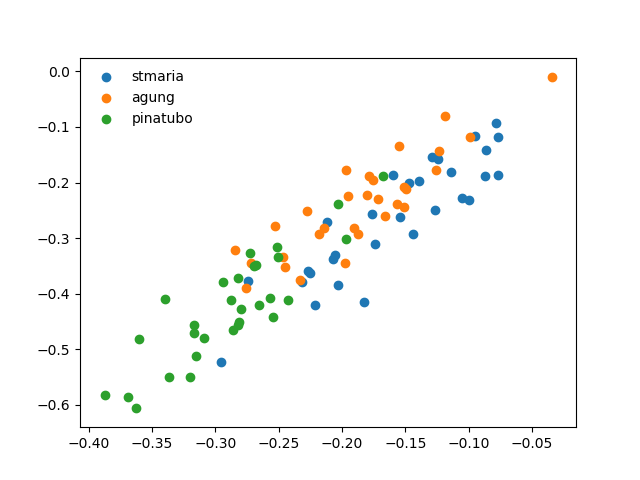

In [17]:
for volc in volcs:
    plt.scatter(dt[volc]['global'], dt[volc]['land'], label=volc)

plt.legend()

<IPython.core.display.Javascript object>


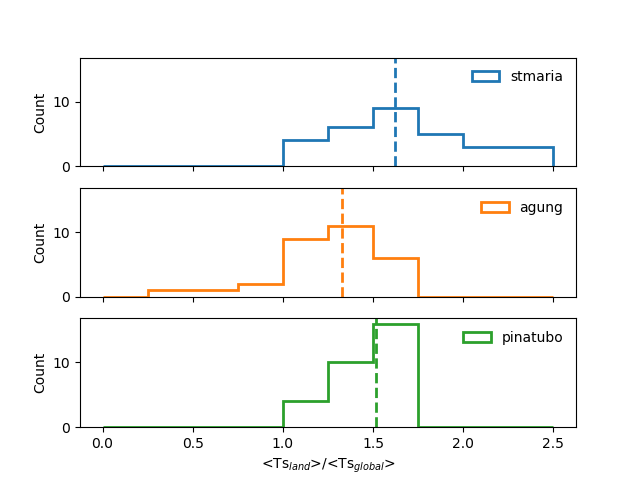

Text(0.5,0,'<Ts$_{land}$>/<Ts$_{global}$>')

In [44]:
fig, axes = plt.subplots(3,1, sharex=True, sharey=True)
for i,volc in enumerate(volcs):
    plt.sca(axes[i])
    ts = dt[volc]['land']/dt[volc]['global']
    ts.plot.hist(bins=np.arange(0,2.6,.25), label=volc, histtype='step', lw=2, color=f'C{i}')
    plt.axvline(ts.median(), color=f'C{i}', ls='--')
    plt.legend()

plt.xlabel('<Ts$_{land}$>/<Ts$_{global}$>')

### `t_surf`-lat 

In [70]:
data_name = 't_surf'
volcs = ['stmaria', 'agung', 'pinatubo']
dt = dict()
for volc in volcs:
    print(volc)
    dt[volc] = dict()
    dt[volc]['global'] = das[volc][data_name].geo.fldmean().mean('time')
    dt[volc]['zonal'] = das[volc][data_name].mean(['lon','time'])

stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


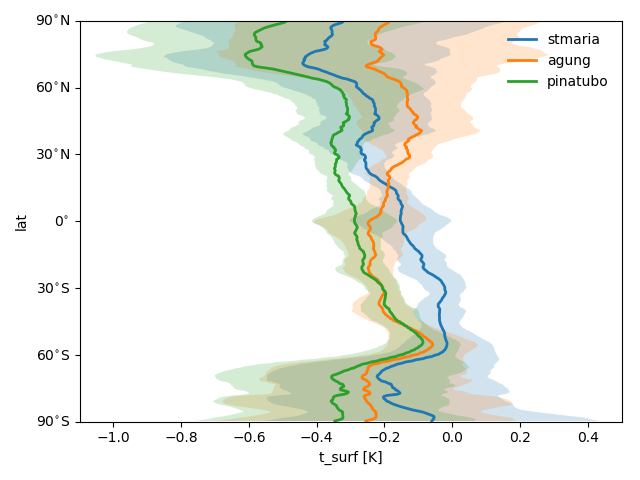

In [71]:
# non-normalized
units = 'K'

for volc in volcs:
    ts = dt[volc]['zonal']
    plt.fill_betweenx(ts.lat, ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    ts.mean('en').plot(y='lat', label=volc)
    

plt.legend()
yticks2lat(range(-90,91,30))
plt.ylim(-90,90)
plt.xlabel(f'{data_name} [{units}]')
plt.xlim(-1.1,.5)

plt.tight_layout()

<IPython.core.display.Javascript object>


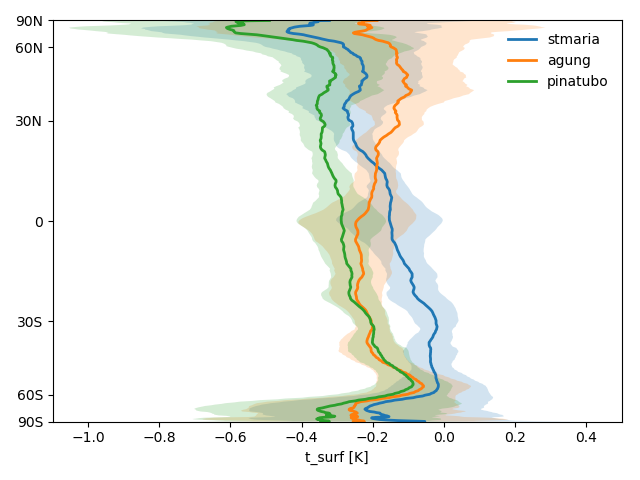

In [93]:
# non-normalized, y:sin(lat) 
units = 'K'

for volc in volcs:
    ts = dt[volc]['zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=volc)
    

plt.legend()
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} [{units}]')
plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])

plt.tight_layout()

<IPython.core.display.Javascript object>


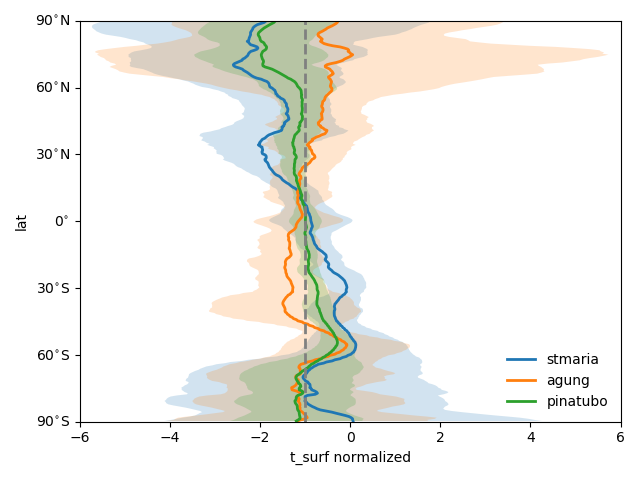

In [72]:
# normalized by global mean Ts
units = 'K'

for volc in volcs:
    ts = dt[volc]['zonal']/dt[volc]['global'].pipe(lambda x: np.abs(x))
    plt.fill_betweenx(ts.lat, ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    ts.mean('en').plot(y='lat', label=volc)
    

plt.legend(loc='lower right')
yticks2lat(range(-90,91,30))
plt.ylim(-90,90)
plt.xlabel(f'{data_name} normalized')
plt.xlim(-6,6)
plt.axvline(-1, color='gray', ls='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


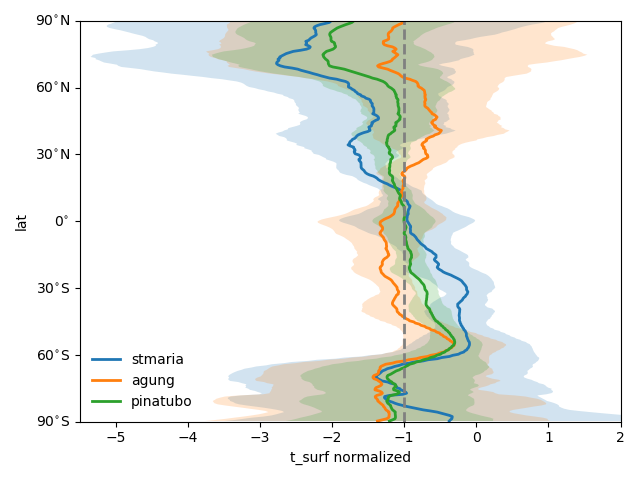

In [90]:
# normalized by global-ens mean Ts
units = 'K'

for volc in volcs:
    ts = dt[volc]['zonal']/( dt[volc]['global'].mean('en').pipe(lambda x: np.abs(x)) )
    plt.fill_betweenx(ts.lat, ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    ts.mean('en').plot(y='lat', label=volc)
    

plt.legend(loc='lower left')
yticks2lat(range(-90,91,30))
plt.ylim(-90,90)
plt.xlabel(f'{data_name} normalized')
plt.xlim(-5.5,2)
plt.axvline(-1, color='gray', ls='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


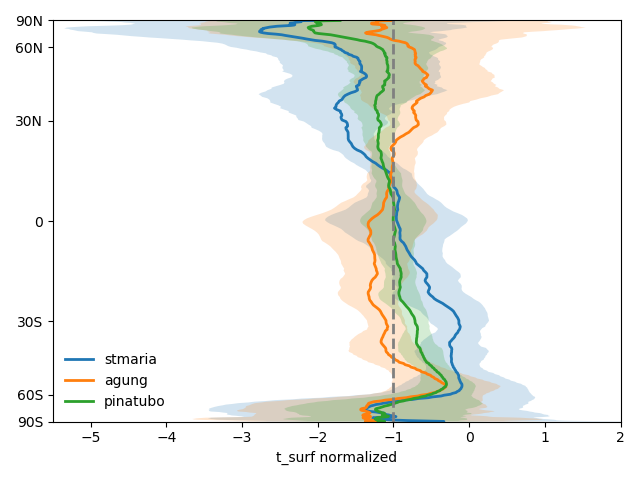

In [87]:
# normalized by global-ens mean Ts, y:sin(lat)
units = 'K'

for volc in volcs:
    ts = dt[volc]['zonal']/( dt[volc]['global'].mean('en').pipe(lambda x: np.abs(x)) )
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi),  label=volc)
    

plt.legend(loc='lower left')
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} normalized')
plt.xlim(-5.5,2)
plt.axvline(-1, color='gray', ls='--')
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])

plt.tight_layout()

#### year 1-3

In [121]:
# data: year 1-3
data_name = 't_surf'
volcs = ['stmaria', 'agung', 'pinatubo']
tspan = slice(0,36)

dt = dict()
for volc in volcs:
    print(volc)
    dt[volc] = dict()
    dt[volc]['global'] = das[volc][data_name].isel(time=tspan).geo.fldmean().mean('time')
    dt[volc]['zonal'] = das[volc][data_name].isel(time=tspan).mean(['lon','time'])
    dt[volc]['global-Ts'] = das[volc]['t_surf'].isel(time=tspan).geo.fldmean().mean('time')

stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


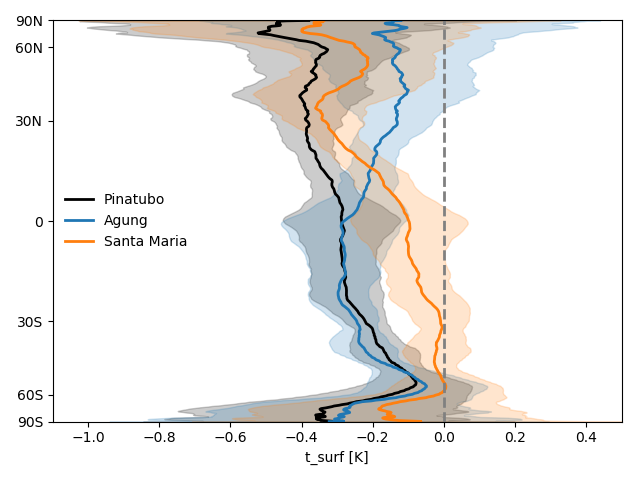

In [128]:
# fig: non-normalized, y:sin(lat) 
units = 'K'
leg_loc = 'center left'
volcs = [('pinatubo', 'Pinatubo', 'k'), 
         ('agung', 'Agung', 'C0'),
         ('stmaria', 'Santa Maria', 'C1')]

for volc,Volc,c in volcs:
    ts = dt[volc]['zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} [{units}]')
plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

### `precip` lat

In [100]:
data_name = 'precip'
volcs = ['stmaria', 'agung', 'pinatubo']
dt = dict()
for volc in volcs:
    print(volc)
    dt[volc] = dict()
    dt[volc]['global'] = das[volc][data_name].geo.fldmean().mean('time')
    dt[volc]['zonal'] = das[volc][data_name].mean(['lon','time'])
    dt[volc]['global-Ts'] = das[volc]['t_surf'].geo.fldmean().mean('time')

stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


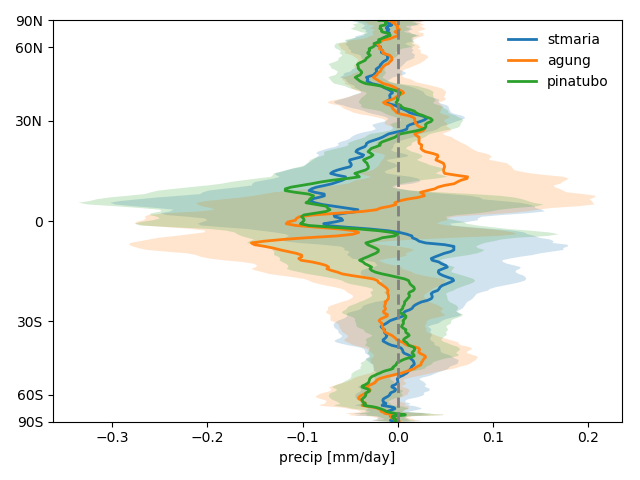

In [96]:
# non-normalized, y:sin(lat) 
units = 'mm/day'

for volc in volcs:
    ts = dt[volc]['zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=volc)
    

plt.legend()
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


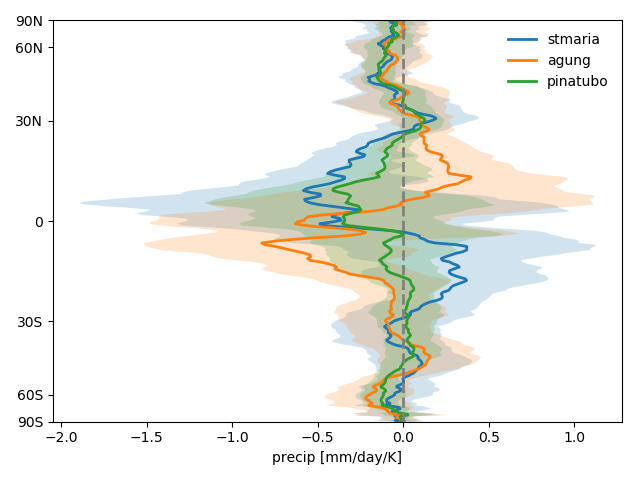

In [101]:
# normalized by global-ens mean Ts, y:sin(lat) 
units = 'mm/day/K'

for volc in volcs:
    ts = dt[volc]['zonal']/(dt[volc]['global-Ts'].mean('en').pipe(lambda x: np.abs(x)))
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=volc)
    

plt.legend()
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

<IPython.core.display.Javascript object>


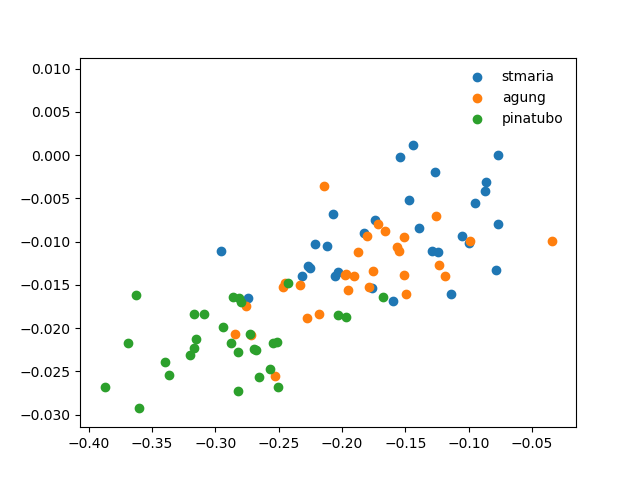

In [105]:
for volc in volcs:
    plt.scatter(dt[volc]['global-Ts'],
                dt[volc]['global'], label=volc)

plt.legend()

<IPython.core.display.Javascript object>


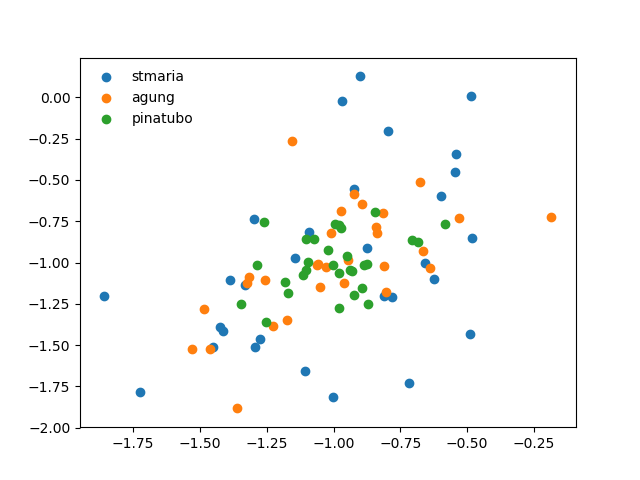

In [104]:
for volc in volcs:
    plt.scatter(dt[volc]['global-Ts']/dt[volc]['global-Ts'].mean('en').pipe(lambda x: np.abs(x)),
                dt[volc]['global']/dt[volc]['global'].mean('en').pipe(lambda x: np.abs(x)), label=volc)

plt.legend()

#### year 1-3

In [130]:
# data: year 1-3
data_name = 'precip'
volcs = ['stmaria', 'agung', 'pinatubo']
tspan = slice(0,36)

dt = dict()
for volc in volcs:
    print(volc)
    dt[volc] = dict()
    dt[volc]['global'] = das[volc][data_name].isel(time=tspan).geo.fldmean().mean('time')
    dt[volc]['zonal'] = das[volc][data_name].isel(time=tspan).mean(['lon','time'])
    dt[volc]['global-Ts'] = das[volc]['t_surf'].isel(time=tspan).geo.fldmean().mean('time')

stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


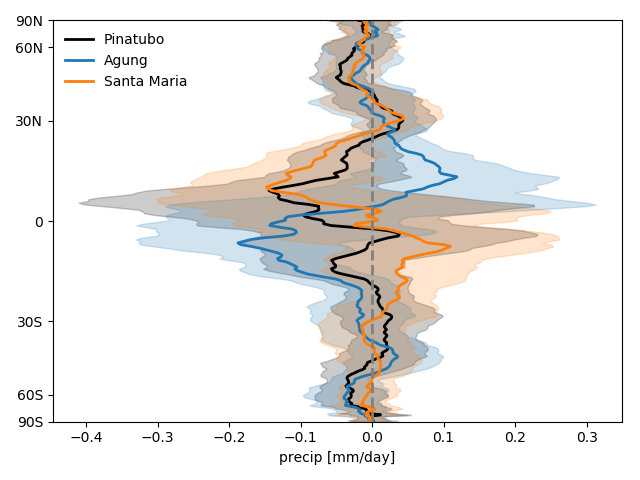

In [131]:
# fig: non-normalized, y:sin(lat) 
units = 'mm/day'
leg_loc = 'upper left'
volcs = [('pinatubo', 'Pinatubo', 'k'), 
         ('agung', 'Agung', 'C0'),
         ('stmaria', 'Santa Maria', 'C1'), 
         ]

for volc,Volc,c in volcs:
    ts = dt[volc]['zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

### `netrad_toa` lat

In [107]:
data_name = 'netrad_toa'
volcs = [('stmaria', 'Santa Maria'), 
         ('agung', 'Agung'), 
         ('pinatubo', 'Pinatubo')]
ds = dict()
for volc,Volc in volcs:
    print(volc)
    ds[f'{volc}-global'] = das[volc][data_name].geo.fldmean().mean('time')
    ds[f'{volc}-zonal'] = das[volc][data_name].mean(['lon','time'])
    ds[f'{volc}-global-Ts'] = das[volc]['t_surf'].geo.fldmean().mean('time')


stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


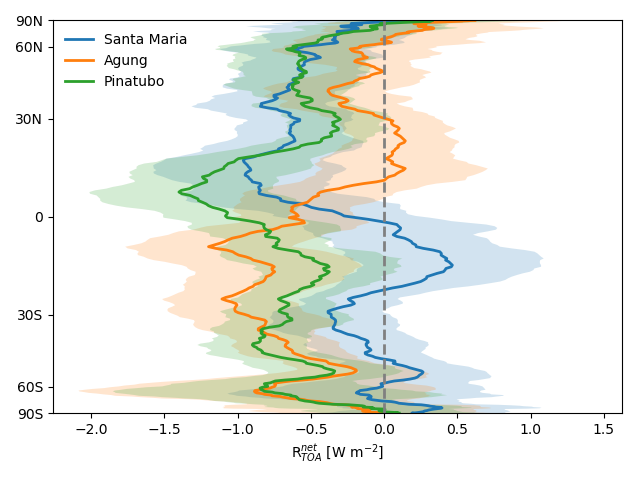

In [111]:
# non-normalized, y:sin(lat) 
units = 'W m$^{-2}$'
data_name_long = 'R$^{net}_{TOA}$'
leg_loc = 'upper left'

for volc,Volc in volcs:
    ts = ds[f'{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc)
    

plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

#### year 1-3

In [132]:
# data: first three years
data_name = 'netrad_toa'
volcs = [('stmaria', 'Santa Maria'), 
         ('agung', 'Agung'), 
         ('pinatubo', 'Pinatubo')]
tspan = slice(0,36) # first 36 months, or 3 years

ds = dict()
for volc,Volc in volcs:
    print(volc)
    ds[f'{volc}-global'] = das[volc][data_name].isel(time=tspan).geo.fldmean().mean('time')
    ds[f'{volc}-zonal'] = das[volc][data_name].isel(time=tspan).mean(['lon','time'])
    ds[f'{volc}-global-Ts'] = das[volc]['t_surf'].isel(time=tspan).geo.fldmean().mean('time')


stmaria
agung
pinatubo


<IPython.core.display.Javascript object>


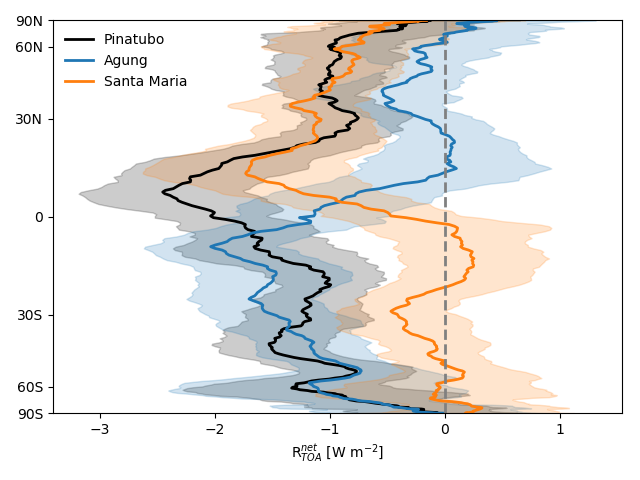

In [134]:
# fig: non-normalized, y:sin(lat), year 1-3
units = 'W m$^{-2}$'
data_name_long = 'R$^{net}_{TOA}$'
leg_loc = 'upper left'
volcs = [('pinatubo', 'Pinatubo', 'k'), 
         ('agung', 'Agung', 'C0'),
         ('stmaria', 'Santa Maria', 'C1'), 
         ]

for volc,Volc,c in volcs:
    ts = ds[f'{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')

plt.tight_layout()

## Fig

### zonal mean

In [254]:
# data
data_names = ['netrad_toa', 't_surf', 'precip']
volcs = [('pinatubo', 'Pinatubo'),
         ('agung', 'Agung'), 
         ('stmaria', 'Santa Maria'), 
         ]
tspan = slice(0,36) # three years
# tspan = slice(0,None) # five years

ds = dict()
for data_name in data_names:
    for volc,Volc in volcs:
        ds[f'{data_name}-{volc}-zonal'] = das[volc][data_name].isel(time=tspan).mean(['lon','time'])
        print(data_name, volc)


netrad_toa pinatubo
netrad_toa agung
netrad_toa stmaria
t_surf pinatubo
t_surf agung
t_surf stmaria
precip pinatubo
precip agung
precip stmaria


<IPython.core.display.Javascript object>


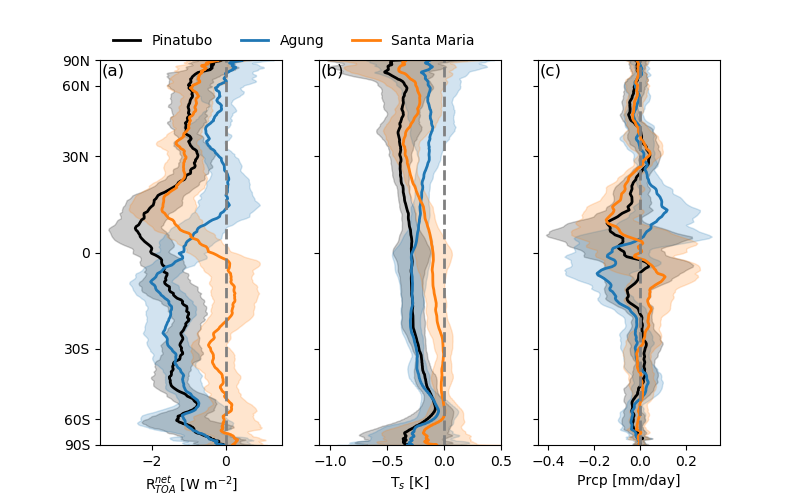

In [259]:
# fig
fig, axes = plt.subplots(1, 3, figsize=(8,5), sharey=True)
volcs = [('pinatubo', 'Pinatubo', 'k'), 
         ('agung', 'Agung', 'C0'),
         ('stmaria', 'Santa Maria', 'C1'), 
         ]

# ################
ax = axes[0]
plt.sca(ax)
units = 'W m$^{-2}$'
data_name_long = 'R$^{net}_{TOA}$'
leg_loc = 'upper left'

for volc,Volc,c in volcs:
    ts = ds[f'netrad_toa-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)

plt.legend(loc=leg_loc, bbox_to_anchor=(0,1.1), ncol=3)
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(a)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')

# ###################
ax = axes[1]
plt.sca(ax)
data_name_long = 'T$_s$'
units = 'K'
leg_loc = 'center left'
for volc,Volc,c in volcs:
    ts = ds[f't_surf-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

# plt.legend(loc=leg_loc)
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(b)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')


# ###################
ax = axes[2]
plt.sca(ax)
data_name_long = 'Prcp'
units = 'mm/day'
for volc,Volc,c in volcs:
    ts = ds[f'precip-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

# plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(c)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')

# plt.tight_layout(rect=(0,0,1,.9), w_pad=0)

figname = 'figs/fig_zonalMean_RTP.pdf'
plt.savefig(figname)

#### 5yr mean

In [260]:
# data
data_names = ['netrad_toa', 't_surf', 'precip']
volcs = [('pinatubo', 'Pinatubo'),
         ('agung', 'Agung'), 
         ('stmaria', 'Santa Maria'), 
         ]
# tspan = slice(0,36) # three years
tspan = slice(0,None) # five years

ds = dict()
for data_name in data_names:
    for volc,Volc in volcs:
        ds[f'{data_name}-{volc}-zonal'] = das[volc][data_name].isel(time=tspan).mean(['lon','time'])
        print(data_name, volc)


netrad_toa pinatubo
netrad_toa agung
netrad_toa stmaria
t_surf pinatubo
t_surf agung
t_surf stmaria
precip pinatubo
precip agung
precip stmaria


<IPython.core.display.Javascript object>


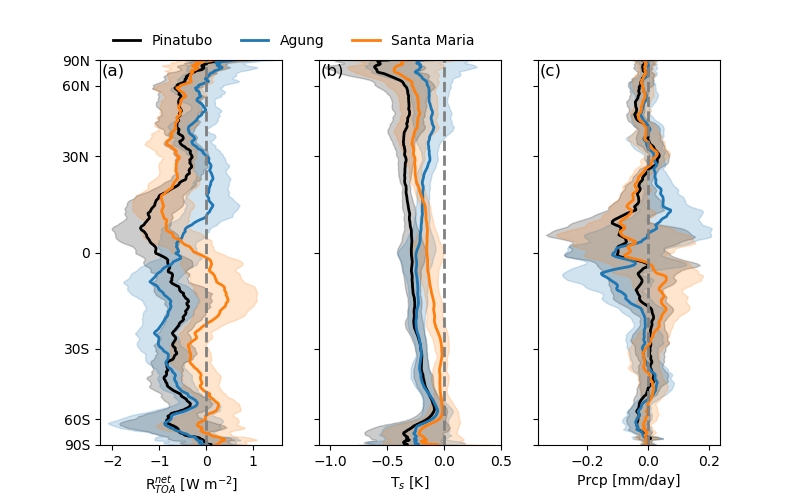

In [261]:
# fig
fig, axes = plt.subplots(1, 3, figsize=(8,5), sharey=True)
volcs = [('pinatubo', 'Pinatubo', 'k'), 
         ('agung', 'Agung', 'C0'),
         ('stmaria', 'Santa Maria', 'C1'), 
         ]

# ################
ax = axes[0]
plt.sca(ax)
units = 'W m$^{-2}$'
data_name_long = 'R$^{net}_{TOA}$'
leg_loc = 'upper left'

for volc,Volc,c in volcs:
    ts = ds[f'netrad_toa-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)

plt.legend(loc=leg_loc, bbox_to_anchor=(0,1.1), ncol=3)
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(a)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')

# ###################
ax = axes[1]
plt.sca(ax)
data_name_long = 'T$_s$'
units = 'K'
leg_loc = 'center left'
for volc,Volc,c in volcs:
    ts = ds[f't_surf-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

# plt.legend(loc=leg_loc)
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(b)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')


# ###################
ax = axes[2]
plt.sca(ax)
data_name_long = 'Prcp'
units = 'mm/day'
for volc,Volc,c in volcs:
    ts = ds[f'precip-{volc}-zonal']
    plt.fill_betweenx(np.sin(ts.lat/180*np.pi), ts.mean('en') - ts.std('en'), ts.mean('en') + ts.std('en'),
                     alpha=.2, color=c)
    plt.plot(ts.mean('en'), np.sin(ts.lat/180*np.pi), label=Volc, color=c)
    

# plt.legend(loc=leg_loc)
# yticks2lat(range(-90,91,30))
plt.ylim(-1,1)
plt.xlabel(f'{data_name_long} [{units}]')
# plt.xlim(-1.1,.5)
plt.yticks([-1, -np.sin(np.pi/3), -.5, 0, .5, np.sin(np.pi/3), 1],
          ['90S', '60S', '30S', '0', '30N', '60N', '90N'])
plt.axvline(0, color='gray', ls='--')
plt.text(.01,.99, '(c)', transform=ax.transAxes, 
         ha='left', va='top', fontsize='large')

# plt.tight_layout(rect=(0,0,1,.9), w_pad=0)

figname = 'figs/fig_zonalMean_RTP_5yrmean.pdf'
plt.savefig(figname)

### scatter: `precip` vs. `netrad_toa`

In [214]:
# data: first three years
data_names = ['precip', 'netrad_toa']
volcs = [('pinatubo', 'Pinatubo'),
         ('agung', 'Agung'), 
         ('stmaria', 'Santa Maria'), 
         ]
tspan = slice(0,36) # first 36 months, or 3 years
NH, SH = slice(0,90), slice(-90,0)
NHt, SHt = slice(0,30), slice(-30,0)

ds = dict()
for data_name in data_names:
    for volc,Volc in volcs:
        if data_name in ('precip',):
            ds[f'{data_name}-{volc}-NHt'] = das[volc][data_name].isel(time=tspan).sel(lat=NHt).geo.fldmean().mean('time')
            ds[f'{data_name}-{volc}-SHt'] = das[volc][data_name].isel(time=tspan).sel(lat=SHt).geo.fldmean().mean('time')
        else:
            ds[f'{data_name}-{volc}-NH'] = das[volc][data_name].isel(time=tspan).sel(lat=NH).geo.fldmean().mean('time')
            ds[f'{data_name}-{volc}-SH'] = das[volc][data_name].isel(time=tspan).sel(lat=SH).geo.fldmean().mean('time')
        
        print(data_name, volc)


precip pinatubo
precip agung
precip stmaria
netrad_toa pinatubo
netrad_toa agung
netrad_toa stmaria


In [215]:
# report
X = np.zeros((90,1))
X[0:30] = (ds['netrad_toa-pinatubo-NH'] - ds['netrad_toa-pinatubo-SH']).values.reshape(30,1)
X[30:60] = (ds['netrad_toa-agung-NH'] - ds['netrad_toa-agung-SH']).values.reshape(30,1)
X[60:90] = (ds['netrad_toa-stmaria-NH'] - ds['netrad_toa-stmaria-SH']).values.reshape(30,1)
y = np.zeros((90,1))
y[0:30] = (ds['precip-pinatubo-NHt'] - ds['precip-pinatubo-SHt']).values.reshape(30,1)
y[30:60] = (ds['precip-agung-NHt'] - ds['precip-agung-SHt']).values.reshape(30,1)
y[60:90] = (ds['precip-stmaria-NHt'] - ds['precip-stmaria-SHt']).values.reshape(30,1)
result = sm.OLS(y, X).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     106.1
Date:                Fri, 27 Jul 2018   Prob (F-statistic):           7.73e-17
Time:                        11:23:19   Log-Likelihood:                 96.657
No. Observations:                  90   AIC:                            -191.3
Df Residuals:                      89   BIC:                            -188.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1009      0.010     10.299      0.0

<IPython.core.display.Javascript object>


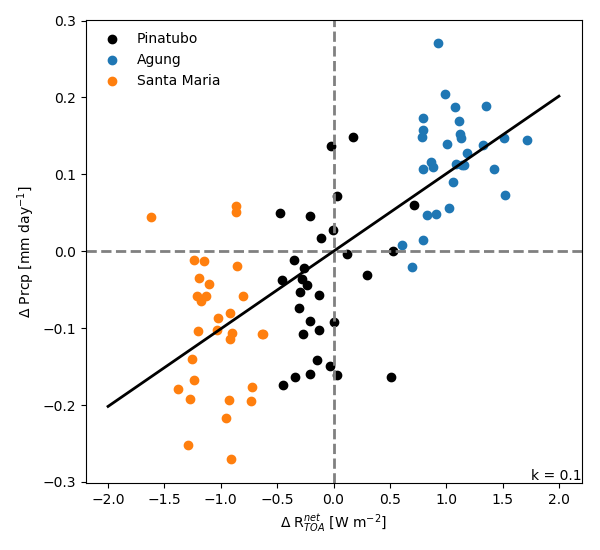

In [217]:
# fig
volcs = [('pinatubo', 'Pinatubo', 'k'),
         ('agung', 'Agung', 'C0'), 
         ('stmaria', 'Santa Maria', 'C1'), 
         ]
xlabel = '$\Delta$ R$^{net}_{TOA}$ [W m$^{-2}$]'
ylabel = '$\Delta$ Prcp [mm day$^{-1}$]'

fig, axes = plt.subplots(1,1, figsize=(6,5.5))

for volc,Volc,c in volcs:
    x = ds[f'netrad_toa-{volc}-NH'] - ds[f'netrad_toa-{volc}-SH']
    y = ds[f'precip-{volc}-NHt'] - ds[f'precip-{volc}-SHt']
    plt.scatter(x, y, color=c, label=Volc)
plt.axvline(0, color='gray', ls='--')
plt.axhline(0, color='gray', ls='--')

x0,x1 = -2,2
k = result.params.item()
plt.plot([x0, x1], [x0*k, x1*k], color='k')
plt.text(1, 0, f'k = {k:.1g}', ha='right', va='bottom', transform=plt.gca().transAxes)

plt.legend(loc='upper left')
plt.xlabel(xlabel)
plt.ylabel(ylabel)

plt.tight_layout()

figname = 'figs/fig_scatter_dP_dR.pdf'
plt.savefig(figname)

### lon-lat maps

In [250]:
# data
data_names = ['netrad_toa', 't_surf', 'precip']
volcs = [('pinatubo', 'Pinatubo'),
         ('agung', 'Agung'), 
         ('stmaria', 'Santa Maria'), 
         ]
tspan = slice(0,36) # three years
# tspan = slice(0,None) # five years

ds = dict()
for data_name in data_names:
    for volc,Volc in volcs:
        da = das[volc][data_name].isel(time=tspan).mean('time')
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en')
        ds[f'{data_name}-{volc}-pvalue'] = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])
        ds[f'{data_name}-{volc}-tmean'] = da
        print(data_name, volc)


netrad_toa pinatubo
netrad_toa agung
netrad_toa stmaria
t_surf pinatubo
t_surf agung
t_surf stmaria
precip pinatubo
precip agung
precip stmaria


<IPython.core.display.Javascript object>


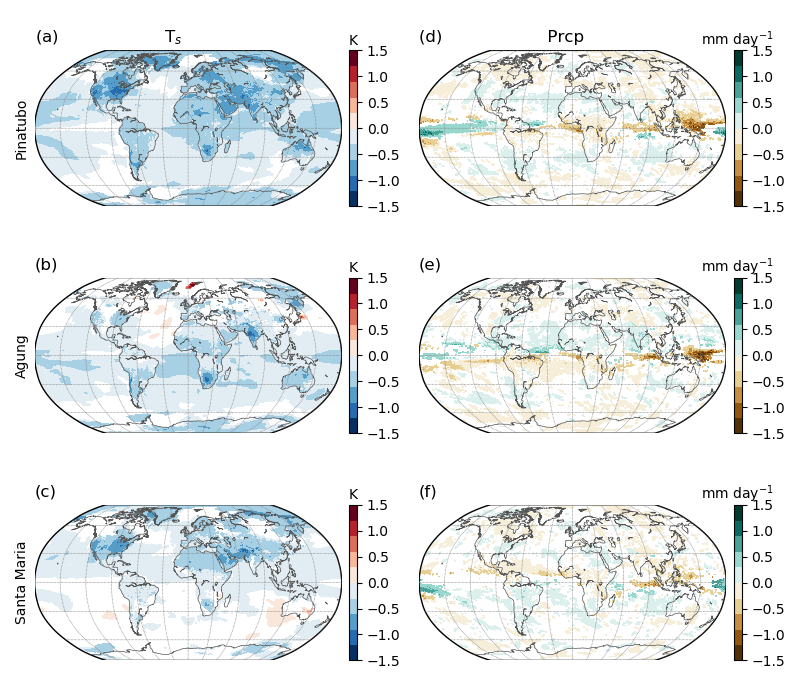

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.


In [251]:
# fig

rcParams['hatch.color'] = 'gray'
hatch_pattern = ['.....']
lon_0 = 0
proj = 'robin'
levels = {'t_surf': np.arange(-1.5,1.6, .3),
          'precip': np.arange(-1.5, 1.6, .3)}
units = {'t_surf': 'K',
        'precip': 'mm day$^{-1}$'}

fig, axes = plt.subplots(3,2,figsize=(8,7), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 't_surf'
volc, Volc = 'pinatubo', 'Pinatubo'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(a)' + ' '*20 + 'T$_s$', loc='left')
plt.ylabel(f'{Volc}')

# ############
plt.sca(axes[1,0])
data_name = 't_surf'
volc, Volc = 'agung', 'Agung'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(b)', loc='left')
plt.ylabel(f'{Volc}')


# ############
plt.sca(axes[2,0])
data_name = 't_surf'
volc, Volc = 'stmaria', 'Santa Maria'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(c)', loc='left')
plt.ylabel(f'{Volc}')

# ############
plt.sca(axes[0,1])
data_name = 'precip'
volc, Volc = 'pinatubo', 'Pinatubo'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(d)' + ' '*20 + 'Prcp', loc='left')

# ############
plt.sca(axes[1,1])
data_name = 'precip'
volc, Volc = 'agung', 'Agung'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(e)', loc='left')

# ############
plt.sca(axes[2,1])
data_name = 'precip'
volc, Volc = 'stmaria', 'Santa Maria'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(f)', loc='left')


plt.tight_layout()

figname = 'figs/fig_maps_3yrmean.pdf'
plt.savefig(figname)

#### 5yr mean

In [252]:
# data
data_names = ['netrad_toa', 't_surf', 'precip']
volcs = [('pinatubo', 'Pinatubo'),
         ('agung', 'Agung'), 
         ('stmaria', 'Santa Maria'), 
         ]
# tspan = slice(0,36) # three years
tspan = slice(0,None) # five years

ds = dict()
for data_name in data_names:
    for volc,Volc in volcs:
        da = das[volc][data_name].isel(time=tspan).mean('time')
        tt, pp = ttest_1samp(da, 0)
        da = da.mean('en')
        ds[f'{data_name}-{volc}-pvalue'] = xr.DataArray(pp, dims=da.dims, coords=[da[dim] for dim in list(da.dims)])
        ds[f'{data_name}-{volc}-tmean'] = da
        print(data_name, volc)


netrad_toa pinatubo
netrad_toa agung
netrad_toa stmaria
t_surf pinatubo
t_surf agung
t_surf stmaria
precip pinatubo
precip agung
precip stmaria


<IPython.core.display.Javascript object>


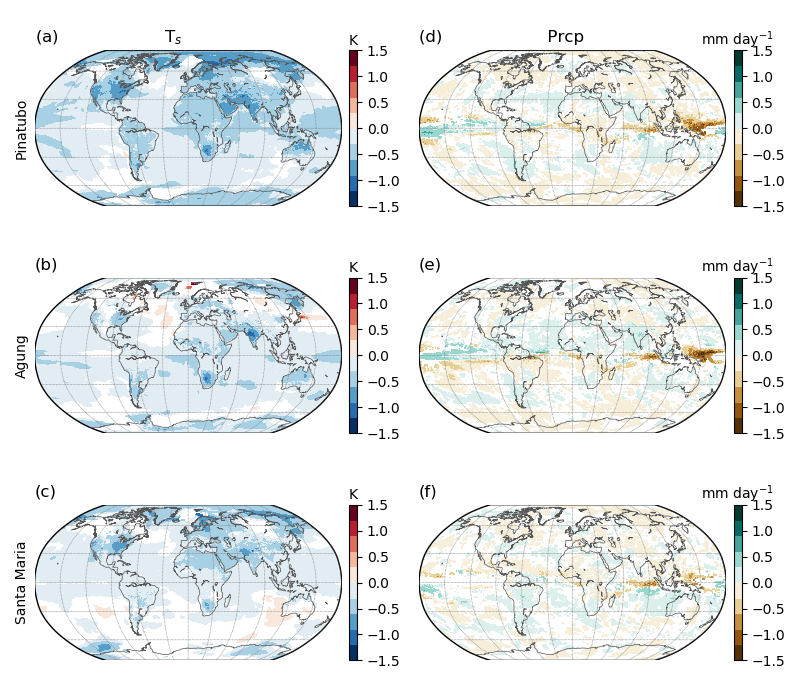

/tigress/wenchang/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.
plot_type **** pcolormesh **** is used.


In [253]:
# fig

rcParams['hatch.color'] = 'gray'
hatch_pattern = ['.....']
lon_0 = 0
proj = 'robin'
levels = {'t_surf': np.arange(-1.5,1.6, .3),
          'precip': np.arange(-1.5, 1.6, .3)}
units = {'t_surf': 'K',
        'precip': 'mm day$^{-1}$'}

fig, axes = plt.subplots(3,2,figsize=(8,7), sharey='row', sharex='col')
# ############
plt.sca(axes[0,0])
data_name = 't_surf'
volc, Volc = 'pinatubo', 'Pinatubo'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(a)' + ' '*20 + 'T$_s$', loc='left')
plt.ylabel(f'{Volc}')

# ############
plt.sca(axes[1,0])
data_name = 't_surf'
volc, Volc = 'agung', 'Agung'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(b)', loc='left')
plt.ylabel(f'{Volc}')


# ############
plt.sca(axes[2,0])
data_name = 't_surf'
volc, Volc = 'stmaria', 'Santa Maria'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)

plt.title('(c)', loc='left')
plt.ylabel(f'{Volc}')

# ############
plt.sca(axes[0,1])
data_name = 'precip'
volc, Volc = 'pinatubo', 'Pinatubo'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(d)' + ' '*20 + 'Prcp', loc='left')

# ############
plt.sca(axes[1,1])
data_name = 'precip'
volc, Volc = 'agung', 'Agung'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(e)', loc='left')

# ############
plt.sca(axes[2,1])
data_name = 'precip'
volc, Volc = 'stmaria', 'Santa Maria'

da = ds[f'{data_name}-{volc}-tmean']
pvalue = ds[f'{data_name}-{volc}-pvalue']
da.where(pvalue<.05).geo.plot(lon_0=lon_0, levels=levels[data_name], proj=proj, cmap='BrBG', units=units[data_name])
# pvalue.where(pvalue<.05).pipe(lambda x:x*0).geo.plot(plot_type='hatch', 
#                                                      lon_0=lon_0,
#                                                      coastline_color='none',
#                                                     hatches=hatch_pattern,
#                                                     proj=proj)
plt.title('(f)', loc='left')


plt.tight_layout()

figname = 'figs/fig_maps_5yrmean.pdf'
plt.savefig(figname)